# Analysis 4
- group by employers
- highest H1B who submitted
- finding the most important role(SOC_NAME) of the top company which applied for H1B
- the location of the company which employs the most important role
- the average wage of every job title under the role in that location

In [30]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('data/H1B_petition_dataset.csv', encoding = "ISO-8859-1")

In [32]:
temp=df.groupby('EMPLOYER_NAME')[['CASE_STATUS']].count().sort_values(by=['CASE_STATUS'],ascending=False).head(15)

In [33]:
temp= temp.reset_index(level=0, drop=False)
temp=temp.head(10)

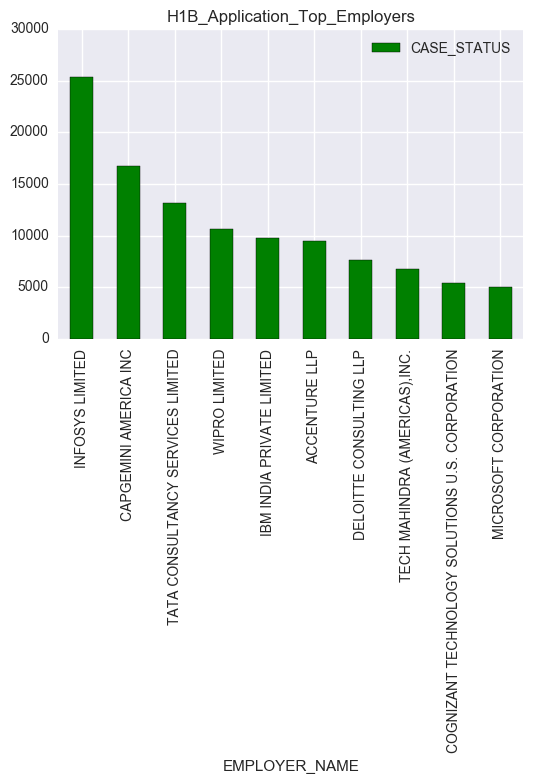

In [35]:
temp.plot.bar(x='EMPLOYER_NAME',y='CASE_STATUS',title='H1B_Application_Top_Employers',legend=True,color='g')
#plt.tight_layout()
plt.gcf().savefig('ana_4/H1B_Application_Top_Employers.png')

In [36]:
#working with INFOSYS LIMITED
data=df[df.EMPLOYER_NAME=='INFOSYS LIMITED']

In [37]:
data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
2817,CERTIFIED,INFOSYS LIMITED,SALES ENGINEER,ACCOUNT MANAGER,Y,180315.0,2016,FOSTER CITY,CALIFORNIA,-122.271079,37.558547
6737,CERTIFIED,INFOSYS LIMITED,SALES ENGINEER,ACCOUNT MANAGER,Y,159370.0,2016,SUNNYVALE,CALIFORNIA,-122.036350,37.368830
10449,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,SENIOR TECHNOLOGY ARCHITECT - US,Y,152880.0,2016,PALO ALTO,CALIFORNIA,-122.143020,37.441883
10455,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,SENIOR TECHNOLOGY ARCHITECT - US,Y,152880.0,2016,SAN JOSE,CALIFORNIA,-121.886329,37.338208
10466,CERTIFIED,INFOSYS LIMITED,INFORMATION TECHNOLOGY PROJECT MANAGERS,SENIOR PROJECT MANAGER - US - PRACTITIONER,Y,152880.0,2016,SUNNYVALE,CALIFORNIA,-122.036350,37.368830


In [38]:
temp=data.groupby('SOC_NAME')[['CASE_STATUS']].count().sort_values(by=['CASE_STATUS'],ascending=False).head(10)

In [39]:
temp= temp.reset_index(level=0,drop=False)

In [40]:
temp.head()

,SOC_NAME,CASE_STATUS
0,COMPUTER SYSTEMS ANALYST,15637
1,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,2631
2,COMPUTER PROGRAMMER,2073
3,COMPUTER SYSTEMS ANALYSTS,1523
4,COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,1380


In [41]:
#taking cases with SOC_NAME as Computer Systems Analyst as they are in demand in INFOSYS LIMITED
new_data=data[data.SOC_NAME.str.contains('COMPUTER SYSTEMS ANALYST')]

In [42]:
new_data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
84647,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,TECHNOLOGY LEAD - US,Y,74443.0,2016,HILLSBORO,OREGON,-122.989827,45.522894
84651,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,TECHNOLOGY ANALYST - US,N,62462.0,2016,EAST HANOVER,NEWJERSEY,-74.364725,40.820062
84654,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,TECHNOLOGY ANALYST - US,N,46301.0,2016,CRANSTON,RHODEISLAND,-71.437280,41.779823
84660,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,PROJECT MANAGER - US,Y,100755.0,2016,NEW YORK,NEWYORK,-74.005941,40.712784
84664,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,TECHNOLOGY LEAD - US,N,57824.0,2016,FORT WAYNE,INDIANA,-85.139351,41.079273


In [43]:
new_data.shape

(17160, 11)

In [44]:
new_data.groupby(['STATE','WORKSITE'])[['CASE_STATUS']].count().sort_values(by=['CASE_STATUS'],ascending=False).head()

,,CASE_STATUS
STATE,WORKSITE,
CALIFORNIA,SUNNYVALE,878
ARIZONA,PHOENIX,834
NORTHCAROLINA,CHARLOTTE,828
GEORGIA,ATLANTA,516
TEXAS,HOUSTON,468


In [45]:
#taking the State with the most number of Applications
output=new_data[new_data.STATE=='CALIFORNIA'][new_data.WORKSITE=='SUNNYVALE']

/Users/kvs25/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [46]:
output.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
120243,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYST,PROJECT MANAGER - US - PRACTITIONER,Y,114795.0,2016,SUNNYVALE,CALIFORNIA,-122.03635,37.36883
120343,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYST,PROJECT MANAGER - US - PRACTITIONER,Y,114795.0,2016,SUNNYVALE,CALIFORNIA,-122.03635,37.36883
120386,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYST,LEAD CONSULTANT - US,Y,114795.0,2016,SUNNYVALE,CALIFORNIA,-122.03635,37.36883
120478,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYST,LEAD CONSULTANT - US - PRACTITIONER,Y,114795.0,2016,SUNNYVALE,CALIFORNIA,-122.03635,37.36883
120479,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYST,LEAD CONSULTANT - US - PRACTITIONER,Y,114795.0,2016,SUNNYVALE,CALIFORNIA,-122.03635,37.36883


In [47]:
output.groupby(['JOB_TITLE'])[['PREVAILING_WAGE']].mean().sort_values(by=['PREVAILING_WAGE'],ascending=False)

,PREVAILING_WAGE
JOB_TITLE,
LEAD CONSULTANT - US - PRACTITIONER,114795.000000
LEAD CONSULTANT - US - PROFESSIONAL,114795.000000
PROJECT MANAGER - US - PRACTITIONER,114795.000000
PROJECT MANAGER - US,108886.875000
LEAD CONSULTANT - US,108509.102041
TECHNOLOGY LEAD - US - PROFESSIONAL,94619.000000
CONSULTANT - US - PRACTITIONER,94619.000000
CONSULTANT - US - PROFESSIONAL,94619.000000
TECHNOLOGY LEAD - US - PRACTITIONER,94619.000000


/Users/kvs25/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:504: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


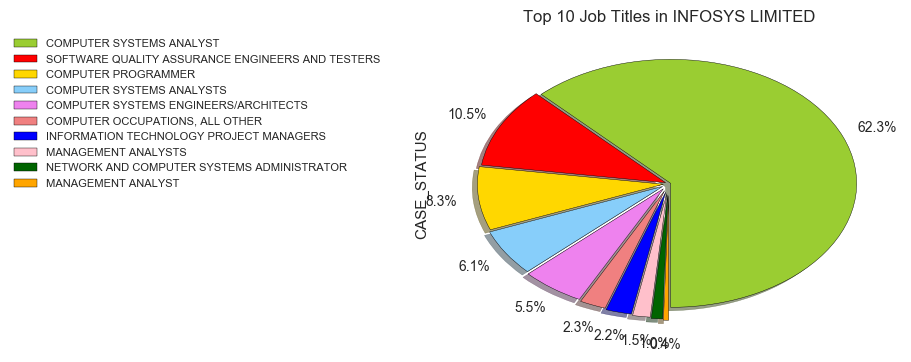

In [48]:
#plotting the ratio of jobs in Infosys Limited
colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue','pink', 'darkgreen','orange']
explode = (0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1)
temp.plot.pie(y='CASE_STATUS',colors=colors,explode=explode,shadow =True,pctdistance=1.2,use_index=False,labels=None,autopct='%1.1f%%',startangle=270,legend=False,title='Top 10 Job Titles in INFOSYS LIMITED')
plt.legend(temp, labels=temp.SOC_NAME.unique(), loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.gcf().savefig('ana_4/INFOSYS_Top_JobTitles.png')